In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

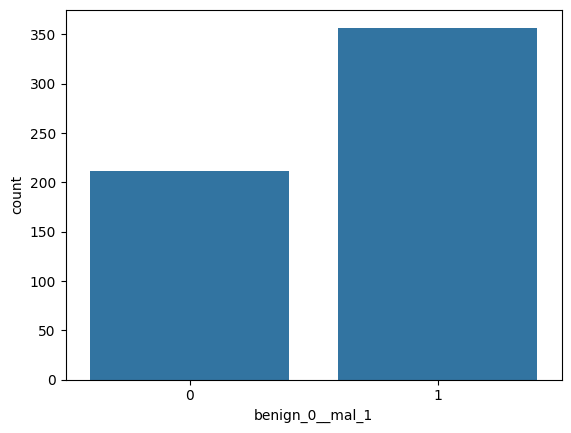

In [8]:
sns.countplot(x='benign_0__mal_1',data=df)

<Axes: >

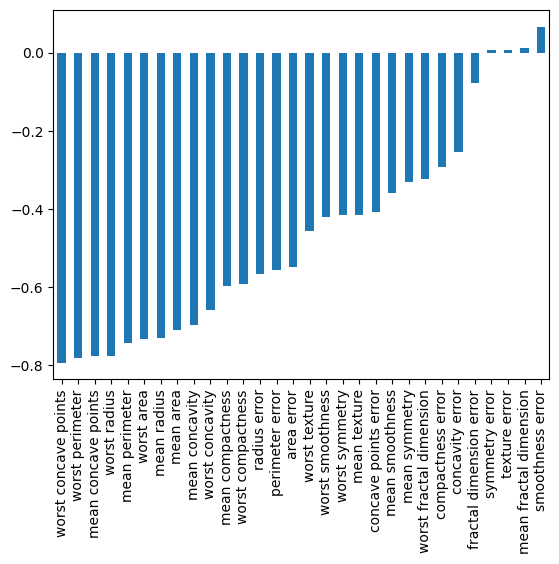

In [14]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<Axes: >

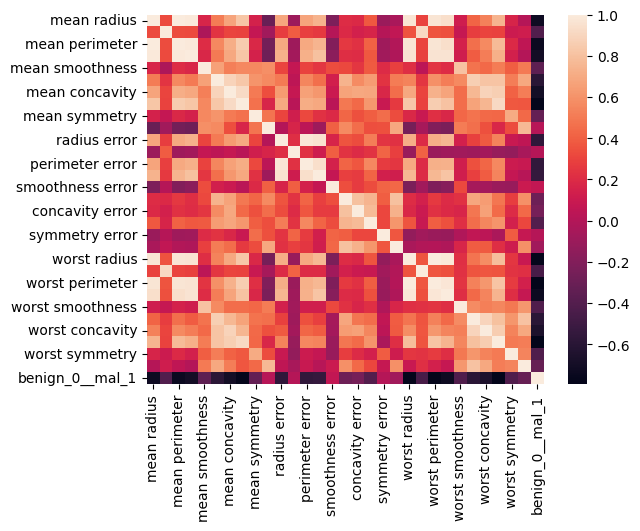

In [16]:
sns.heatmap(df.corr())

In [17]:
X = df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scale = MinMaxScaler()

In [24]:
X_train = scale.fit_transform(X_train)

In [25]:
X_test = scale.transform(X_test)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense

In [27]:
X_train.shape

(426, 30)

In [28]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [29]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.6942 - val_loss: 0.6725
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6594 - val_loss: 0.6412
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6249 - val_loss: 0.6035
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5878 - val_loss: 0.5644
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.5439 - val_loss: 0.5220
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.5132 - val_loss: 0.4817
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.4739 - val_loss: 0.4393
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.4372 - val_loss: 0.3988
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3962 - val_loss: 0.3626
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3716 - val_loss: 0.3270
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3482 - val_loss: 0.2977
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0599 - val_loss: 0.1289
Epoch 69/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0654 - val_loss: 0.1319
Epoch 70/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0534 - val_loss: 0.1317
Epoch 71/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0533 - val_loss: 0.1355
Epoch 72/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0496 - val_loss: 0.1346
Epoch 73/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0465 - val_loss: 0.1298
Epoch 74/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0603 - val_loss: 0.1367
Epoch 75/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0537 - val_loss: 0.1311
Epoch 76/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0492 - val_loss: 0.1378
Epoch 77/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0639 - val_loss: 0.1332
Epoch 78/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0490 - val_loss: 0.1355
Epoch 79/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - l

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0568 - val_loss: 0.1462
Epoch 136/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0340 - val_loss: 0.1600
Epoch 137/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0350 - val_loss: 0.1458
Epoch 138/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0518 - val_loss: 0.1459
Epoch 139/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0422 - val_loss: 0.1495
Epoch 140/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0315 - val_loss: 0.1489
Epoch 141/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0479 - val_loss: 0.1510
Epoch 142/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0492 - val_loss: 0.1557
Epoch 143/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0329 - val_loss: 0.1459
Epoch 144/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - val_loss: 0.1530
Epoch 145/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0350 - val_loss: 0.1503
Epoch 146/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0251 - val_loss: 0.1683
Epoch 203/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0368 - val_loss: 0.1717
Epoch 204/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0416 - val_loss: 0.1688
Epoch 205/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0280 - val_loss: 0.1706
Epoch 206/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0367 - val_loss: 0.1709
Epoch 207/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0414 - val_loss: 0.1693
Epoch 208/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0301 - val_loss: 0.1735
Epoch 209/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0359 - val_loss: 0.1674
Epoch 210/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0469 - val_loss: 0.1740
Epoch 211/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0366 - val_loss: 0.1663
Epoch 212/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0413 - val_loss: 0.1677
Epoch 213/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0287 - val_loss: 0.1951
Epoch 270/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0232 - val_loss: 0.1879
Epoch 271/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0248 - val_loss: 0.1901
Epoch 272/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0280 - val_loss: 0.1968
Epoch 273/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0231 - val_loss: 0.1939
Epoch 274/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0367 - val_loss: 0.1965
Epoch 275/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0296 - val_loss: 0.1960
Epoch 276/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0346 - val_loss: 0.1959
Epoch 277/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0342 - val_loss: 0.2003
Epoch 278/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0220 - val_loss: 0.1936
Epoch 279/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0275 - val_loss: 0.1978
Epoch 280/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0297 - val_loss: 0.2280
Epoch 337/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0328 - val_loss: 0.2113
Epoch 338/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0184 - val_loss: 0.2247
Epoch 339/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0355 - val_loss: 0.2180
Epoch 340/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0224 - val_loss: 0.2153
Epoch 341/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0149 - val_loss: 0.2269
Epoch 342/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0291 - val_loss: 0.2167
Epoch 343/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0254 - val_loss: 0.2380
Epoch 344/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0204 - val_loss: 0.2159
Epoch 345/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0167 - val_loss: 0.2311
Epoch 346/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0194 - val_loss: 0.2212
Epoch 347/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0229 - val_loss: 0.2493
Epoch 404/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0193 - val_loss: 0.2478
Epoch 405/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0219 - val_loss: 0.2637
Epoch 406/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0244 - val_loss: 0.2430
Epoch 407/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0207 - val_loss: 0.2577
Epoch 408/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0265 - val_loss: 0.2420
Epoch 409/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0238 - val_loss: 0.2772
Epoch 410/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0220 - val_loss: 0.2555
Epoch 411/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0231 - val_loss: 0.2506
Epoch 412/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0167 - val_loss: 0.2523
Epoch 413/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0175 - val_loss: 0.2558
Epoch 414/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0229 - val_loss: 0.2758
Epoch 471/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0094 - val_loss: 0.2759
Epoch 472/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0120 - val_loss: 0.2778
Epoch 473/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0181 - val_loss: 0.2758
Epoch 474/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0260 - val_loss: 0.2885
Epoch 475/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0129 - val_loss: 0.2753
Epoch 476/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0211 - val_loss: 0.2808
Epoch 477/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0185 - val_loss: 0.2834
Epoch 478/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0200 - val_loss: 0.2779
Epoch 479/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0168 - val_loss: 0.2817
Epoch 480/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0127 - val_loss: 0.2792
Epoch 481/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0181 - val_loss: 0.3179
Epoch 538/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0123 - val_loss: 0.3036
Epoch 539/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0134 - val_loss: 0.3111
Epoch 540/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0173 - val_loss: 0.3086
Epoch 541/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0161 - val_loss: 0.3147
Epoch 542/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0141 - val_loss: 0.3195
Epoch 543/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0181 - val_loss: 0.3183
Epoch 544/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0152 - val_loss: 0.3183
Epoch 545/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0095 - val_loss: 0.3110
Epoch 546/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0151 - val_loss: 0.3369
Epoch 547/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0139 - val_loss: 0.3175
Epoch 548/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20

In [31]:
loss = pd.DataFrame(model.history.history)

In [32]:
loss

,loss,val_loss
0,0.687679,0.672458
1,0.654552,0.641180
2,0.617638,0.603484
3,0.580178,0.564442
4,0.541370,0.522023
...,...,...
595,0.014411,0.341242
596,0.013233,0.357613
597,0.014819,0.336791
598,0.013553,0.348496


<Axes: >

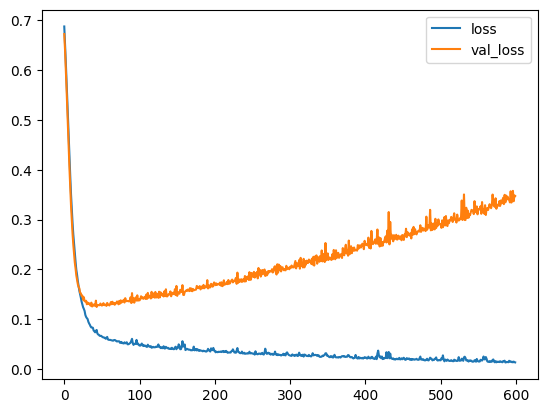

In [33]:
loss.plot()

In [34]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [35]:
from tensorflow.keras.callbacks import  EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [37]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.6577 - val_loss: 0.6386
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6202 - val_loss: 0.6066
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5830 - val_loss: 0.5738
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5520 - val_loss: 0.5400
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5148 - val_loss: 0.5032
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4838 - val_loss: 0.4628
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4441 - val_loss: 0.4216
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4002 - val_loss: 0.3747
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3569 - val_loss: 0.3336
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3224 - val_loss: 0.2918
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2632 - val_loss: 0.2606
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

In [38]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

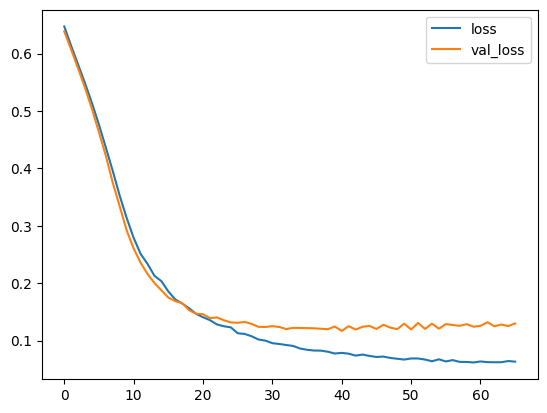

In [39]:
model_loss.plot()

In [40]:
from tensorflow.keras.layers import Dropout

In [41]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [42]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.7111 - val_loss: 0.6621
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6718 - val_loss: 0.6507
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.6653 - val_loss: 0.6342
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6250 - val_loss: 0.6057
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.6182 - val_loss: 0.5737
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6123 - val_loss: 0.5416
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.5825 - val_loss: 0.5102
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.5461 - val_loss: 0.4753
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5336 - val_loss: 0.4439
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4700 - val_loss: 0.4116
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4765 - val_loss: 0.3833
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1203 - val_loss: 0.0924
Epoch 69/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1143 - val_loss: 0.0906
Epoch 70/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1122 - val_loss: 0.0909
Epoch 71/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1251 - val_loss: 0.0920
Epoch 72/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1200 - val_loss: 0.0934
Epoch 73/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1101 - val_loss: 0.0992
Epoch 74/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1141 - val_loss: 0.0910
Epoch 75/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1213 - val_loss: 0.0878
Epoch 76/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0959 - val_loss: 0.0964
Epoch 77/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1205 - val_loss: 0.0881
Epoch 78/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1169 - val_loss: 0.0882
Epoch 79/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - l

In [43]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

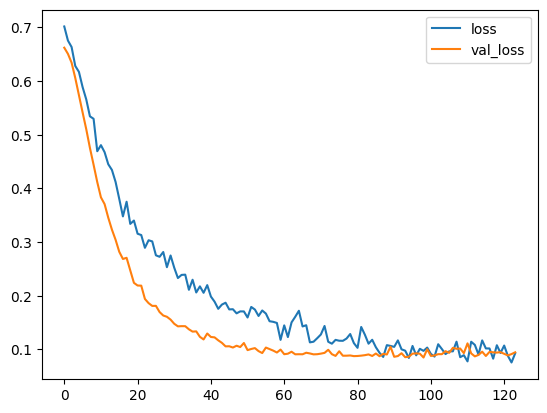

In [44]:
model_loss.plot()

In [52]:
pred = (model.predict(X_test) > 0.5).astype("int32")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [55]:
print(confusion_matrix(y_test,pred))

[[54  1]
 [ 3 85]]
